# Elastic Net Regularized ($\ell_1$ and $\ell_2$ penalized regression)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn import datasets

### Generate some random (but constant, hence the random seed) datasets

Use pi as the bias term just so we have something to which to compare the model's intercept

In [2]:
X, y, coef = datasets.make_regression(n_samples=5000,
                                      n_features=100,
                                      n_targets=1,
                                      noise=0.1,
                                      bias=np.pi,
                                      coef=True)

In [3]:
batch_size = 100

### Initialize the tensorflow graph

In [4]:
session = tf.Session()

Create the model's tensorflow placeholders

In [5]:
x_data   = tf.placeholder(shape=[None, 100], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

Create the regression variables

In [6]:
A = tf.Variable(tf.random_normal(shape=[100,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

Create the model's operation

In [7]:
model_output = tf.add(tf.matmul(x_data, A), b)

### Create the elastic net loss function

Ridge regularization

In [8]:
elastic_parameter1 = tf.constant(1.)
l1_loss = tf.reduce_mean(tf.abs(A))
e1_term = tf.multiply(elastic_parameter1, l1_loss)

LASSO regularization

In [9]:
elastic_parameter2 = tf.constant(1.)
l2_loss = tf.reduce_mean(tf.square(A))
e2_term = tf.multiply(elastic_parameter2, l2_loss)

Elasticnet regularization

In [10]:
enet_loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)

### Optimizer setup

In [11]:
optimizer  = tf.train.GradientDescentOptimizer(0.0007)
train_step = optimizer.minimize(enet_loss) 

In [12]:
init = tf.global_variables_initializer()
session.run(init)

In [13]:
# Keep successive loss function values in a list for plotting
loss_vector = []

for i in range(5000):
    random_index = np.random.choice(len(X), size=batch_size)
    random_x = X[random_index]
    random_y = np.transpose([y[random_index]])
    
    session.run(train_step, feed_dict={x_data: random_x, y_target: random_y})
    temp_loss = session.run(enet_loss, feed_dict={x_data: random_x, y_target: random_y})
    
    loss_vector.append(temp_loss[0])

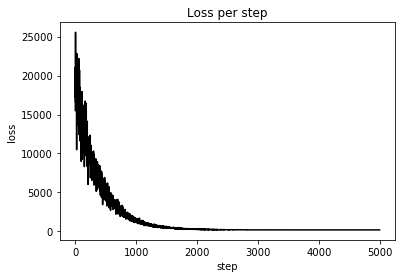

In [14]:
plt.plot(loss_vector, 'k-')
plt.title('Loss per step')
plt.xlabel('step')
plt.ylabel('loss')
plt.show()